# Programming Exercise 3
# Multi-class Classification and Neural Networks

## Introduction


Trong bài tập này, bạn sẽ triển khai hồi quy logistic một so với tất cả và mạng nơ ron để nhận dạng các chữ số viết tay. Trước khi bắt đầu bài tập lập trình, chúng tôi đặc biệt khuyên bạn nên xem video bài giảng và hoàn thành các câu hỏi ôn tập cho các chủ đề liên quan.

Tất cả thông tin bạn cần để giải bài tập này đều có trong sổ ghi chép này và tất cả mã bạn sẽ thực hiện sẽ diễn ra trong sổ ghi chép này. Bài tập có thể được nộp ngay cho học sinh lớp trong khóa học trực tiếp từ sổ ghi chép này (mã và hướng dẫn được bao gồm bên dưới).

Trước khi bắt đầu với các bài tập, chúng ta cần nhập tất cả các thư viện cần thiết cho bài tập lập trình này. Trong suốt khóa học, chúng tôi sẽ sử dụng [`numpy`](http://www.numpy.org/) cho tất cả các mảng và phép toán ma trận, [`matplotlib`](https://matplotlib.org/) for plotting, and [`scipy`](https://docs.scipy.org/doc/scipy/reference/) cho các chức năng và công cụ tính toán số và khoa học. Bạn có thể tìm thấy hướng dẫn về cách cài đặt các thư viện bắt buộc trong tệp README trong [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

In [8]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Submission and Grading


After completing each part of the assignment, be sure to submit your solutions to the grader. The following is a breakdown of how each part of this exercise is scored.


| Section | Part                                 | Submission function                   |  Points 
| :-      |:-                                    | :-                                    |  :-:    
| 1       | [Regularized Logistic Regression](#section1)     | [`lrCostFunction`](#lrCostFunction)   | 30     
| 2       | [One-vs-all classifier training](#section2)       | [`oneVsAll`](#oneVsAll)               | 20     
| 3       | [One-vs-all classifier prediction](#section3)     | [`predictOneVsAll`](#predictOneVsAll) | 20     
| 4       | [Neural Network Prediction Function](#section4)   | [`predict`](#predict)           | 30
|         | Total Points                         |                                 | 100    


You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

<div class="alert alert-block alert-warning">
At the end of each section in this notebook, we have a cell which contains code for submitting the solutions thus far to the grader. Execute the cell to see your score up to the current section. For all your work to be submitted properly, you must execute those cells at least once. They must also be re-executed everytime the submitted function is updated.
</div>

## 1 Multi-class Classification

Đối với bài tập này, bạn sẽ sử dụng hồi quy logistic và mạng nơ-ron để nhận dạng các chữ số viết tay (từ 0 đến 9). Nhận dạng chữ số viết tay tự động được sử dụng rộng rãi ngày nay - từ nhận dạng mã zip (mã bưu điện) trên phong bì thư đến nhận dạng số tiền được viết trên séc ngân hàng. Bài tập này sẽ cho bạn thấy các phương pháp bạn đã học có thể được sử dụng như thế nào cho nhiệm vụ phân loại này.

Trong phần đầu tiên của bài tập, bạn sẽ mở rộng việc triển khai hồi quy logistic trước đây của mình và áp dụng nó cho phân loại một so với tất cả.

### 1.1 Dataset

Bạn được cung cấp một tập dữ liệu trong `ex3data1.mat` chứa 5000 ví dụ đào tạo về các chữ số viết tay (Đây là một tập con của tập dữ liệu chữ số viết tay [MNIST] (http://yann.lecun.com/exdb/mnist)). Định dạng `.mat` có nghĩa là dữ liệu đã được lưu ở định dạng ma trận Octave / MATLAB gốc, thay vì định dạng văn bản (ASCII) như tệp csv. Chúng tôi sử dụng định dạng `.mat` ở đây vì đây là tập dữ liệu được cung cấp trong phiên bản MATLAB của bài tập này. May mắn thay, python cung cấp cơ chế tải định dạng gốc MATLAB bằng cách sử dụng chức năng `loadmat` trong mô-đun` scipy.io`. Hàm này trả về một từ điển python với các khóa chứa tên biến trong tệp `.mat`.

Có 5000 ví dụ đào tạo trong `ex3data1.mat`, trong đó mỗi ví dụ đào tạo là một hình ảnh thang độ xám 20 pixel x 20 pixel của chữ số. Mỗi pixel được biểu thị bằng một số dấu chấm động cho biết cường độ thang độ xám tại vị trí đó. Lưới 20 x 20 pixel được "mở" thành vectơ 400 chiều. Mỗi ví dụ đào tạo này trở thành một hàng duy nhất trong ma trận dữ liệu `X` của chúng tôi. Điều này cho chúng ta ma trận 5000 x 400 `X` trong đó mỗi hàng là một ví dụ đào tạo cho hình ảnh chữ số viết tay.

$$ X = \begin{bmatrix} - \: (x^{(1)})^T \: - \\ -\: (x^{(2)})^T \:- \\ \vdots \\ - \: (x^{(m)})^T \:-  \end{bmatrix} $$

Phần thứ hai của tập huấn luyện là vectơ 5000 chiều `y` chứa các nhãn cho tập huấn luyện.
Chúng tôi bắt đầu bài tập bằng cách tải tập dữ liệu đầu tiên. Thực hiện ô bên dưới, bạn không cần phải viết bất kỳ mã nào ở đây.

In [9]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

#  training data stored in arrays X, y
data = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

m = y.size

### 1.2 Visualizing the data

Bạn sẽ bắt đầu bằng cách hình dung một tập hợp con của tập huấn luyện. Trong ô sau, mã chọn ngẫu nhiên 100 hàng từ `X` và chuyển các hàng đó đến hàm` displayData`. Chức năng này ánh xạ mỗi hàng thành hình ảnh thang độ xám 20 pixel x 20 pixel và hiển thị các hình ảnh cùng nhau. Chúng tôi đã cung cấp hàm `displayData` trong tệp` utils.py`. Bạn được khuyến khích kiểm tra mã để xem nó hoạt động như thế nào. Chạy ô sau để trực quan hóa dữ liệu.

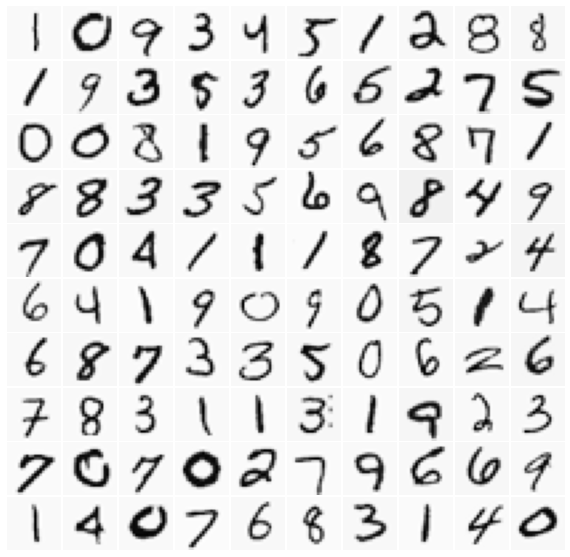

In [10]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

### 1.3 Vectorizing Logistic Regression

Bạn sẽ sử dụng nhiều mô hình hồi quy logistic một so với tất cả để xây dựng bộ phân loại nhiều lớp. Vì có 10 lớp, bạn sẽ cần đào tạo 10 bộ phân loại hồi quy logistic riêng biệt. Để làm cho quá trình đào tạo này hiệu quả, điều quan trọng là đảm bảo rằng mã của bạn được vector hóa tốt. Trong phần này, bạn sẽ triển khai một phiên bản vectơ của hồi quy logistic không sử dụng bất kỳ vòng lặp `for` nào. Bạn có thể sử dụng mã của mình trong bài tập trước làm điểm bắt đầu cho bài tập này.

Để kiểm tra hồi quy logistic được vector hóa của bạn, chúng tôi sẽ sử dụng dữ liệu tùy chỉnh như được xác định trong ô sau.

In [11]:
# test values for the parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for the inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for the labels
y_t = np.array([1, 0, 1, 0, 1])

# test value for the regularization parameter
lambda_t = 3

<a id="section1"></a>
#### 1.3.1 Vectorizing the cost function 

Chúng ta sẽ bắt đầu bằng cách viết một phiên bản vector hóa của hàm chi phí. Nhớ lại rằng trong hồi quy logistic (không được điều chỉnh), hàm chi phí là

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left( h_\theta\left( x^{(i)} \right) \right) - \left(1 - y^{(i)} \right) \log \left(1 - h_\theta \left( x^{(i)} \right) \right) \right] $$

Để tính toán từng phần tử trong phần tổng kết, chúng ta phải tính $h_\theta(x^{(i)})$ cho mọi ví dụ $i$, where $h_\theta(x^{(i)}) = g(\theta^T x^{(i)})$ and $g(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function. Nó chỉ ra rằng chúng ta có thể tính toán điều này một cách nhanh chóng cho tất cả các ví dụ của chúng tôi bằng cách sử dụng phép nhân ma trận. Hãy để chúng tôi xác định $X$ và $\theta$ là

$$ X = \begin{bmatrix} - \left( x^{(1)} \right)^T - \\ - \left( x^{(2)} \right)^T - \\ \vdots \\ - \left( x^{(m)} \right)^T - \end{bmatrix} \qquad \text{and} \qquad \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} $$

Then, by computing the matrix product $X\theta$, we have: 

$$ X\theta = \begin{bmatrix} - \left( x^{(1)} \right)^T\theta - \\ - \left( x^{(2)} \right)^T\theta - \\ \vdots \\ - \left( x^{(m)} \right)^T\theta - \end{bmatrix} = \begin{bmatrix} - \theta^T x^{(1)}  - \\ - \theta^T x^{(2)} - \\ \vdots \\ - \theta^T x^{(m)}  - \end{bmatrix} $$

Trong bình đẳng cuối cùng, chúng tôi sử dụng thực tế rằng $a^Tb = b^Ta$ if $a$ and $b$ are vectors. Điều này cho phép chúng tôi tính toán các sản phẩm $\theta^T x^{(i)}$ cho tất cả các ví dụ của chúng tôi $i$ trong một dòng mã.

#### 1.3.2 Vectorizing the gradient

Recall that the gradient of the (unregularized) logistic regression cost is a vector where the $j^{th}$ element is defined as

$$ \frac{\partial J }{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( \left( h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_j^{(i)} \right) $$

Để vectơ hóa hoạt động này trên tập dữ liệu, chúng tôi bắt đầu bằng cách viết ra tất cả các đạo hàm riêng một cách rõ ràng cho tất cả $\theta_j$,

$$
\begin{align*}
\begin{bmatrix} 
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2} \\
\vdots \\
\frac{\partial J}{\partial \theta_n}
\end{bmatrix} = &
\frac{1}{m} \begin{bmatrix}
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_0^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_1^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_2^{(i)}\right) \\
\vdots \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_n^{(i)}\right) \\
\end{bmatrix} \\
= & \frac{1}{m} \sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x^{(i)}\right) \\
= & \frac{1}{m} X^T \left( h_\theta(x) - y\right)
\end{align*}
$$

where

$$  h_\theta(x) - y = 
\begin{bmatrix}
h_\theta\left(x^{(1)}\right) - y^{(1)} \\
h_\theta\left(x^{(2)}\right) - y^{(2)} \\
\vdots \\
h_\theta\left(x^{(m)}\right) - y^{(m)} 
\end{bmatrix} $$

Note that $x^{(i)}$ is a vector, while $h_\theta\left(x^{(i)}\right) - y^{(i)}$  is a scalar (single number).
To understand the last step of the derivation, let $\beta_i = (h_\theta\left(x^{(m)}\right) - y^{(m)})$ and
observe that:

$$ \sum_i \beta_ix^{(i)} = \begin{bmatrix} 
| & | & & | \\
x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\
| & | & & | 
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_m
\end{bmatrix} = x^T \beta
$$

where the values $\beta_i = \left( h_\theta(x^{(i)} - y^{(i)} \right)$.

Biểu thức trên cho phép chúng ta tính tất cả các đạo hàm riêng mà không cần bất kỳ vòng lặp nào. Nếu bạn cảm thấy thoải mái với đại số tuyến tính, chúng tôi khuyến khích bạn làm việc thông qua các phép nhân ma trận ở trên để thuyết phục bản thân rằng phiên bản vector hóa thực hiện các phép tính tương tự. 

Your job is to write the unregularized cost function `lrCostFunction` which returns both the cost function $J(\theta)$ and its gradient $\frac{\partial J}{\partial \theta}$. Việc triển khai của bạn nên sử dụng chiến lược mà chúng tôi đã trình bày ở trên để tính toán $\theta^T x^{(i)}$. Bạn cũng nên sử dụng phương pháp vector hóa cho phần còn lại của hàm chi phí. Một phiên bản vectơ hóa đầy đủ của `lrCostFunction` không được chứa bất kỳ vòng lặp nào.

<div class="alert alert-box alert-warning">
** Mẹo gỡ lỗi: ** Việc vẽ mã vector đôi khi có thể phức tạp. Một chiến lược phổ biến để gỡ lỗi là in ra kích thước của ma trận mà bạn đang làm việc bằng cách sử dụng thuộc tính `shape` của mảng` numpy`. Ví dụ, đã cho một ma trận dữ liệu $X$ of size $100 \times 20$ (100 examples, 20 features) and $\theta$, a vector with size $20$, you can observe that `np.dot(X, theta)` is a valid multiplication operation, while `np.dot(theta, X)` is not. Hơn nữa, nếu bạn có phiên bản mã không được vector hóa, bạn có thể so sánh đầu ra của mã được vector hóa và mã không được vector hóa để đảm bảo rằng chúng tạo ra các đầu ra giống nhau.
</div>
<a id="lrCostFunction"></a>

In [12]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Computes the cost of using theta as the parameter for regularized
    logistic regression and the gradient of the cost w.r.t. to the parameters.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept.  
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (including intercept).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta
    
    Hint 1
    ------
    The computation of the cost function and gradients can be efficiently
    vectorized. For example, consider the computation
    
        sigmoid(X * theta)
    
    Each row of the resulting matrix will contain the value of the prediction
    for that example. You can make use of this to vectorize the cost function
    and gradient computations. 
    
    Hint 2
    ------
    When computing the gradient of the regularized cost function, there are
    many possible vectorized solutions, but one solution looks like:
    
        grad = (unregularized gradient for logistic regression)
        temp = theta 
        temp[0] = 0   # because we don't add anything for j = 0
        grad = grad + YOUR_CODE_HERE (using the temp variable)
    
    Hint 3
    ------
    We have provided the implementatation of the sigmoid function within 
    the file `utils.py`. At the start of the notebook, we imported this file
    as a module. Thus to access the sigmoid function within that file, you can
    do the following: `utils.sigmoid(z)`.
    
    """
    #Initialize some useful values
    m = y.size
    n = theta.size
    
    # convert labels to ints if their type is bool
    if y.dtype == bool:
        y = y.astype(int)
    
    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(theta.shape)
    
    # ====================== YOUR CODE HERE ======================

    # Compute h
    h = utils.sigmoid(np.dot(X, theta))
    
    # Compute cost J
    J = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) + (lambda_/(2*m)) * (np.dot(theta[1:].T, theta[1:]))

    # Compute grad for j = 0
    grad[0] = (1/m) * (np.dot(X[:, 0].T, h-y))
    
    # Compute grad for j >= 1
    for i in range(1, n):
        grad[i] = (1/m) * (np.dot(X[:, i].T, h-y)) + (lambda_/m) * (theta[i])
        
    # =============================================================
    return J, grad

#### 1.3.3 Vectorizing regularized logistic regression

Sau khi bạn đã thực hiện vectơ hóa cho hồi quy logistic, bây giờ bạn sẽ thêm chính quy hóa vào hàm chi phí. Nhớ lại rằng đối với hồi quy logistic chính quy, hàm chi phí được định nghĩa là

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left(h_\theta\left(x^{(i)} \right)\right) - \left( 1 - y^{(i)} \right) \log\left(1 - h_\theta \left(x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Lưu ý rằng bạn không nên chính quy hóa $ \ theta_0 $ được sử dụng cho thuật ngữ thiên vị. Tương ứng, đạo hàm riêng của chi phí hồi quy logistic chính quy cho $ \ theta_j $ được định nghĩa là

$$
\begin{align*}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)}  & \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_0} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \text{for } j  \ge 1
\end{align*}
$$

Bây giờ, hãy sửa đổi mã của bạn trong lrCostFunction trong [** ô trước đó **] (# lrCostFunction) để giải thích cho công thức hóa. Một lần nữa, bạn không nên đặt bất kỳ vòng lặp nào vào mã của mình.

<div class="alert alert-box alert-warning">
** python / numpy Mẹo: ** Khi triển khai vectơ hóa cho hồi quy logistic chính quy, bạn thường có thể muốn chỉ tính tổng và cập nhật các phần tử nhất định của $ \ theta $. Trong `numpy`, bạn có thể lập chỉ mục vào các ma trận để chỉ truy cập và cập nhật các phần tử nhất định. Ví dụ: A [:, 3: 5] = B [:, 1: 3] sẽ thay thế các cột có chỉ số 3 đến 5 của A bằng các cột có chỉ số 1 đến 3 từ B. Để chọn cột (hoặc hàng) cho đến khi cuối ma trận, bạn có thể để trống phía bên tay phải của dấu hai chấm. Ví dụ: A [:, 2:] sẽ chỉ trả về các phần tử từ $ 3 ^ {rd} $ đến cột cuối cùng của $ A $. Nếu bạn để trống kích thước bên trái của dấu hai chấm, bạn sẽ chọn các phần tử từ đầu ma trận. Ví dụ, A [:,: 2] chọn hai cột đầu tiên và tương đương với A [:, 0: 2]. Ngoài ra, bạn có thể sử dụng các chỉ số âm để lập chỉ mục các mảng từ cuối. Do đó, A [:,: -1] chọn tất cả các cột của A trừ cột cuối cùng và A [:, -5:] chọn cột $ 5 ^ {th} $ từ cuối đến cột cuối cùng. Do đó, bạn có thể sử dụng điều này cùng với các phép toán tổng và lũy thừa ($ ^ {**} $) để chỉ tính tổng của các phần tử mà bạn quan tâm (ví dụ: `np.sum (z [1:] ** 2 ) '). Trong mã khởi động, `lrCostFunction`, chúng tôi cũng đã cung cấp các gợi ý về một phương pháp khả thi khác tính toán gradient chính quy.
</div>

Sau khi hoàn thành việc triển khai, bạn có thể gọi hàm `lrCostFunction` để kiểm tra giải pháp của mình bằng cách sử dụng ô sau:

In [13]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]')

Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


Sau khi hoàn thành một phần của bài tập, bạn có thể gửi các giải pháp của mình để chấm điểm bằng cách thêm chức năng bạn đã sửa đổi vào đối tượng gửi trước, sau đó gửi chức năng của bạn đến Coursera để chấm điểm.

Tập lệnh gửi sẽ nhắc bạn về e-mail đăng nhập và mã thông báo gửi. Bạn có thể lấy mã thông báo gửi từ trang web cho bài tập. Bạn được phép gửi các giải pháp của mình nhiều lần và chúng tôi sẽ chỉ xem xét điểm cao nhất.

* Thực hiện ô sau để chấm điểm lời giải của bạn cho phần đầu tiên của bài tập này. *

In [ ]:
# appends the implemented function in part 1 to the grader object
grader[1] = lrCostFunction

# send the added functions to coursera grader for getting a grade on this part
grader.grade()

<a id="section2"></a>
### 1.4 One-vs-all Classification

Trong phần này của bài tập, bạn sẽ thực hiện phân loại một đối một bằng cách đào tạo nhiều bộ phân loại hồi quy logistic chính quy, một bộ phân loại cho mỗi lớp $ K $ trong tập dữ liệu của chúng tôi. Trong tập dữ liệu chữ số viết tay, $ K = 10 $, nhưng mã của bạn phải hoạt động với bất kỳ giá trị nào của $ K $.

Bây giờ bạn nên hoàn thành mã cho hàm `oneVsAll` bên dưới, để đào tạo một bộ phân loại cho mỗi lớp. Đặc biệt, mã của bạn phải trả về tất cả các tham số phân loại trong một ma trận $\theta \in \mathbb{R}^{K \times (N +1)}$, where each row of $\theta$ tương ứng với các tham số hồi quy logistic đã học cho một lớp. Bạn có thể làm điều này với “for”-loop from $0$ to $K-1$, đào tạo từng bộ phân loại một cách độc lập.

Lưu ý rằng đối số `y` cho hàm này là một vectơ có nhãn từ 0 đến 9. Khi đào tạo trình phân loại cho lớp $k \in \{0, ..., K-1\}$, bạn sẽ muốn một vectơ K-chiều của các nhãn $y$, where $y_j \in 0, 1$ chỉ ra liệu the $j^{th}$ training instance belongs to class $k$ $(y_j = 1)$, or if it belongs to a different class $(y_j = 0)$. Bạn có thể thấy các mảng logic hữu ích cho nhiệm vụ này.

Hơn nữa, bạn sẽ sử dụng scipy's'mize.minimize` cho bài tập này.
<a id="oneVsAll"></a>

In [15]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of 
        data points, and n is the number of features. Note that we 
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X. 
    
    y : array_like
        The data labels. A vector of shape (m, ).
    
    num_labels : int
        Number of possible labels.
    
    lambda_ : float
        The logistic regularization parameter.
    
    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    
    Instructions
    ------------
    You should complete the following code to train `num_labels`
    logistic regression classifiers with regularization parameter `lambda_`. 
    
    Hint
    ----
    You can use y == c to obtain a vector of 1's and 0's that tell you
    whether the ground truth is true/false for this class.
    
    Note
    ----
    For this assignment, we recommend using `scipy.optimize.minimize(method='CG')`
    to optimize the cost function. It is okay to use a for-loop 
    (`for c in range(num_labels):`) to loop over the different classes.
    
    Example Code
    ------------
    
        # Set Initial theta
        initial_theta = np.zeros(n + 1)
      
        # Set options for minimize
        options = {'maxiter': 50}
    
        # Run minimize to obtain the optimal theta. This function will 
        # return a class object where theta is in `res.x` and cost in `res.fun`
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='TNC',
                                options=options) 
    """
    # Some useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly 
    all_theta = np.zeros((num_labels, n + 1))

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # ====================== YOUR CODE HERE ======================
   
    for c in range(num_labels):
        initial_theta = np.zeros(n+1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                               initial_theta,
                               (X, (y==c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        
        all_theta[c] = res.x
    # ============================================================
    return all_theta

After you have completed the code for `oneVsAll`, the following cell will use your implementation to train a multi-class classifier. 

In [16]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)

*You should now submit your solutions.*

In [10]:
grader[2] = oneVsAll
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
            Regularized Logistic Regression |  30 /  30 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |   0 /  20 | 
         Neural Network Prediction Function |   0 /  30 | 
                                  --------------------------------
                                            |  50 / 100 |  



<a id="section3"></a>
#### 1.4.1 One-vs-all Prediction

After training your one-vs-all classifier, you can now use it to predict the digit contained in a given image. For each input, you should compute the “probability” that it belongs to each class using the trained logistic regression classifiers. Your one-vs-all prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (0, 1, ..., K-1) as the prediction for the input example. You should now complete the code in the function `predictOneVsAll` to use the one-vs-all classifier for making predictions. 
<a id="predictOneVsAll"></a>

In [17]:
def predictOneVsAll(all_theta, X):
    """
    Return a vector of predictions for each example in the matrix X. 
    Note that X contains the examples in rows. all_theta is a matrix where
    the i-th row is a trained logistic regression theta vector for the 
    i-th class. You should set p to a vector of values from 0..K-1 
    (e.g., p = [0, 2, 0, 1] predicts classes 0, 2, 0, 1 for 4 examples) .
    
    Parameters
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.
    
    X : array_like
        Data points to predict their labels. This is a matrix of shape 
        (m x n) where m is number of data points to predict, and n is number 
        of features without the bias term. Note we add the bias term for X in 
        this function. 
    
    Returns
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned logistic
    regression parameters (one-vs-all). You should set p to a vector of predictions
    (from 0 to num_labels-1).
    
    Hint
    ----
    This code can be done all vectorized using the numpy argmax function.
    In particular, the argmax function returns the index of the max element,
    for more information see '?np.argmax' or search online. If your examples
    are in rows, then, you can use np.argmax(A, axis=1) to obtain the index 
    of the max for each row.
    """
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # ====================== YOUR CODE HERE ======================

    Z = np.dot(X, all_theta.T)
    for i in range(m):
        p[i] = np.argmax(Z[i], axis = 0)
    
    # ============================================================
    return p

Once you are done, call your `predictOneVsAll` function using the learned value of $\theta$. You should see that the training set accuracy is about 95.1% (i.e., it classifies 95.1% of the examples in the training set correctly).

In [18]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 95.16%


*You should now submit your solutions.*

In [13]:
grader[3] = predictOneVsAll
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
            Regularized Logistic Regression |  30 /  30 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |  20 /  20 | Nice work!
         Neural Network Prediction Function |   0 /  30 | 
                                  --------------------------------
                                            |  70 / 100 |  



## 2 Neural Networks

Trong phần trước của bài tập này, bạn đã triển khai hồi quy logistic nhiều lớp để nhận dạng các chữ số viết tay. Tuy nhiên, hồi quy logistic không thể hình thành các giả thuyết phức tạp hơn vì nó chỉ là một bộ phân loại tuyến tính (Bạn có thể thêm nhiều tính năng hơn - chẳng hạn như các tính năng đa thức - vào hồi quy logistic, nhưng điều đó có thể rất tốn kém để đào tạo).

Trong phần này của bài tập, bạn sẽ thực hiện một mạng nơ-ron để nhận dạng các chữ số viết tay bằng cách sử dụng cùng một tập huấn luyện như trước đây. Mạng nơron sẽ có thể biểu diễn các mô hình phức tạp hình thành các giả thuyết phi tuyến tính. Trong tuần này, bạn sẽ sử dụng các tham số từ mạng nơ-ron mà chúng tôi đã đào tạo. Mục tiêu của bạn là triển khai thuật toán truyền tải tiếp theo để sử dụng trọng số của chúng tôi để dự đoán. Trong bài tập của tuần tới, bạn sẽ viết thuật toán lan truyền ngược để tìm hiểu các tham số mạng nơron.

Trước tiên, chúng ta bắt đầu bằng cách tải lại và hình dung tập dữ liệu chứa các chữ số viết tay MNIST (điều này giống như chúng ta đã làm trong phần đầu tiên của bài tập này, chúng ta tải lại nó ở đây để đảm bảo các biến không bị sửa đổi).

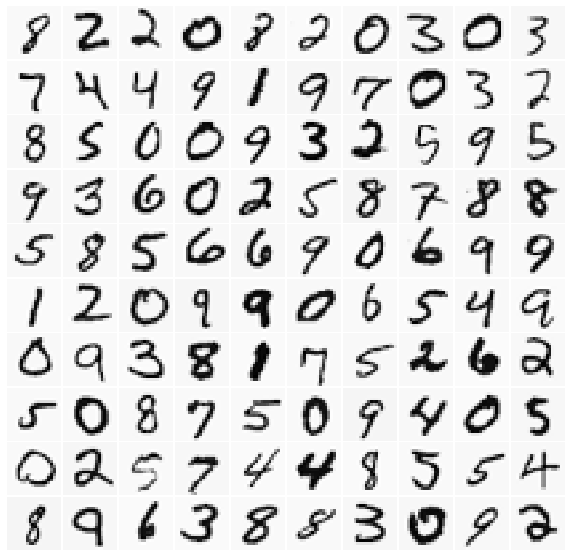

In [14]:
#  training data stored in arrays X, y
data = loadmat(os.path.join('Data', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

# get number of examples in dataset
m = y.size

# randomly permute examples, to be used for visualizing one 
# picture at a time
indices = np.random.permutation(m)

# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)


### 2.1 Model representation 

Our neural network is shown in the following figure.

![Neural network](Figures/neuralnetwork.png)

Nó có 3 lớp: lớp đầu vào, lớp ẩn và lớp đầu ra. Nhớ lại rằng đầu vào của chúng ta là giá trị pixel của hình ảnh chữ số. Vì hình ảnh có kích thước 20 × 20, điều này cho chúng ta 400 đơn vị lớp đầu vào (không bao gồm đơn vị thiên vị phụ luôn xuất ra +1). Như trước đây, dữ liệu huấn luyện sẽ được tải vào các biến X và y.

Bạn đã được cung cấp with a set of network parameters ($\Theta^{(1)}$, $\Theta^{(2)}$) already trained by us. Những thứ này được lưu trữ in `ex3weights.mat`. Ô sau tải các tham số đó vào  `Theta1` and `Theta2`. Các tham số có kích thước được định cỡ cho mạng nơ-ron với 25 đơn vị ở lớp thứ hai và 10 đơn vị đầu ra (tương ứng với các lớp 10 chữ số).

In [15]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

# Load the .mat file, which returns a dictionary 
weights = loadmat(os.path.join('Data', 'ex3weights.mat'))

# get the model weights from the dictionary
# Theta1 has size 25 x 401
# Theta2 has size 10 x 26
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

<a id="section4"></a>
### 2.2 Feedforward Propagation and Prediction

Bây giờ bạn sẽ thực hiện truyền tải tiếp theo cho mạng nơ-ron. Bạn sẽ cần phải hoàn thành mã trong hàm `predict` để trả về dự đoán của mạng nơ-ron. Bạn nên triển khai tính toán chuyển tiếp nguồn cấp dữ liệu để tính toán $h_\theta(x^{(i)})$ for every example $i$ và trả về các dự đoán liên quan. Tương tự như chiến lược phân loại một so với tất cả, dự đoán từ mạng thần kinh sẽ là nhãn có sản lượng lớn nhất $\left( h_\theta(x) \right)_k$.

<div class="alert alert-box alert-warning">
** Lưu ý triển khai: ** Ma trận $ X $ chứa các ví dụ theo hàng. Khi bạn hoàn thành mã trong hàm `dự đoán`, bạn sẽ cần thêm cột của 1 vào ma trận. Ma trận `Theta1` và` Theta2` chứa các tham số cho mỗi đơn vị trong hàng. Cụ thể, hàng đầu tiên của `Theta1` tương ứng với đơn vị ẩn đầu tiên trong lớp thứ hai. Trong `numpy`, khi bạn tính toán $z^{(2)} = \theta^{(1)}a^{(1)}$, đảm bảo rằng bạn lập chỉ mục (và nếu cần, chuyển đổi) $ X $ một cách chính xác để bạn nhận được $a^{(l)}$ as a 1-D vector.
</div>
<a id="predict"></a>

In [16]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network.
    
    Parameters
    ----------
    Theta1 : array_like
        Weights for the first layer in the neural network.
        It has shape (2nd hidden layer size x input size)
    
    Theta2: array_like
        Weights for the second layer in the neural network. 
        It has shape (output layer size x 2nd hidden layer size)
    
    X : array_like
        The image inputs having shape (number of examples x image dimensions).
    
    Return 
    ------
    p : array_like
        Predictions vector containing the predicted label for each example.
        It has a length equal to the number of examples.
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned neural
    network. You should set p to a vector containing labels 
    between 0 to (num_labels-1).
     
    Hint
    ----
    This code can be done all vectorized using the numpy argmax function.
    In particular, the argmax function returns the index of the  max element,
    for more information see '?np.argmax' or search online. If your examples
    are in rows, then, you can use np.argmax(A, axis=1) to obtain the index
    of the max for each row.
    
    Note
    ----
    Remember, we have supplied the `sigmoid` function in the `utils.py` file. 
    You can use this function by calling `utils.sigmoid(z)`, where you can 
    replace `z` by the required input variable to sigmoid.
    """
    # Make sure the input has two dimensions
    if X.ndim == 1:
        X = X[None]  # promote to 2-dimensions
    
    # useful variables
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros(X.shape[0])

    # ====================== YOUR CODE HERE ======================

    # Add bias unit to X 
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    for i in range(m):
        input_layer = X[i]
        hidden_layer = utils.sigmoid(np.dot(input_layer, Theta1.T))
        hidden_layer = np.concatenate([np.ones([1]), hidden_layer], axis=0)
        output_layer = utils.sigmoid(np.dot(hidden_layer, Theta2.T))
        p[i] = np.argmax(output_layer, axis=0)

    # =============================================================
    return p

Once you are done, call your predict function using the loaded set of parameters for `Theta1` and `Theta2`. You should see that the accuracy is about 97.5%.

In [17]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 97.5%


Sau đó, chúng tôi sẽ hiển thị lần lượt các hình ảnh từ tập huấn luyện, đồng thời in nhãn dự đoán cho hình ảnh được hiển thị.

Chạy ô sau để hiển thị một hình ảnh dự đoán của mạng nơ-ron. Bạn có thể chạy ô nhiều lần để xem các dự đoán cho các hình ảnh khác nhau.

Neural Network Prediction: 8.0


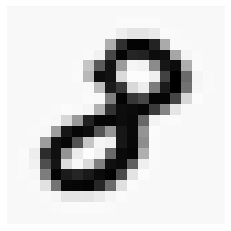

In [22]:
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    utils.displayData(X[i, :], figsize=(4, 4))
    pred = predict(Theta1, Theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')

*You should now submit your solutions.*

In [23]:
grader[4] = predict
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks



Use token from last successful submission (anwarcse.me@gmail.com)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
            Regularized Logistic Regression |  30 /  30 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |  20 /  20 | Nice work!
         Neural Network Prediction Function |  30 /  30 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

